# Spam Classifier
## Assignment Preamble
Please ensure you carefully read all of the details and instructions on the assignment page, this section, and the rest of the notebook. If anything is unclear at any time please post on the forum or ask a tutor well in advance of the assignment deadline.

In addition to all of the instructions in the body of the assignment below, you must also follow the following technical instructions for all assignments in this unit. *Failure to do so may result in a grade of zero.*
* [At the bottom of the page](#Submission-Test) is some code which checks you meet the submission requirements. You **must** ensure that this runs correctly before submission.
* Do not modify or delete any of the cells that are marked as test cells, even if they appear to be empty.
* Do not duplicate any cells in the notebook – this can break the marking script. Instead, insert a new cell (e.g. from the menu) and copy across any contents as necessary.

Remember to save and backup your work regularly, and double-check you are submitting the correct version.

This notebook is the primary reference for your submission. You may write code in separate `.py` files but it must be clearly imported into the notebook so that it runs without needing to reference those files, and you must explain clearly what functionality is contained in those files (through comments, markdown cells, etc).

As always, **the work you submit for this assignment must be entirely your own.** Do not copy or work with other students. Do not copy answers that you find online. These assignments are designed to help improve your understanding first and foremost – the process of doing the assignment is part of *learning*. They are also used to assess your ability, and so you must uphold academic integrity. Submitting plagiarised work risks your entire place on your degree.

**The pass mark for this assignment is 40%.** We expect that students, on average, will be able to produce a submission which gets a mark between 50-70% within the normal workload allocation for the unit, but this will vary depending on individual backgrounds. Please ask for help if you are struggling.

## Getting Started
Spam refers to unwanted email, often in the form of advertisements. In the literature, an email that is **not** spam is called *ham*. Most email providers offer automatic spam filtering, where spam emails will be moved to a separate inbox based on their contents. Of course this requires being able to scan an email and determine whether it is spam or ham, a classification problem. This is the subject of this assignment.

This assignment has two parts. Each part is worth 50% of the overall grade for this assignment.

For part one you will write a supervised learning based classifier to determine whether a given email is spam or ham. You must write and submit the code in this notebook. The training data is provided for you. You may use any classification method. Marks will be awarded primarily based on the accuracy of your classifier on unseen test data, but there are also marks for estimating how accurate you think your classifier will be.

In part two you will produce a short video explaining your implementation, any decisions or extensions you made, and what parameter values you used. This part is explained in more detail on the assignment page. The video file must be submitted with your assignment.

### Choice of Algorithm
While the classification method is a completely free choice, the assignment folder includes [a separate notebook file](data/naivebayes.ipynb) which can help you implement a Naïve Bayes solution. If you do use this notebook, you are still responsible for porting your code into *this* notebook for submission. A good implementation should give a high  enough accuracy to get a good grade on this section (50-70%).

You could also consider a k-nearest neighbour algorithm, but this may be less accurate. Logistic regression is another option that you may wish to consider.

If you are looking to go beyond the scope of the unit, you might be interested in building something more advanced, like an artificial neural network. This is possible just using `numpy`, but will require significant self-directed learning. *Extensions like this are left unguided and are not factored into the unit workload estimates.*

**Note:** you may use helper functions in libraries like `numpy` or `scipy`, but you **must not** import code which builds entire models for you. This includes but is not limited to use of libraries like `scikit-learn`, `tensorflow`, or `pytorch` – there will be plenty of opportunities for these libraries in later units. The point of this assignment is to understand code the actual algorithm yourself. ***If you are in any doubt about any particular library or function please ask a tutor.*** Submissions which ignore this will receive penalties or even zero marks.

If you choose to implement more than one algorithm, please feel free to include your code and talk about it in part two (your video presentation), but only the code in this notebook will be used in the automated testing.

## Training Data
The training data is described below and has 1000 rows. There is also a 500 row set of test data. These are functionally identical to the training data, they are just in a separate csv file to encourage you to split out your training and test data. You should consider how to best make use of all available data without overfitting, and to help produce an unbiased estimate for your classifier's accuracy.

The cell below loads the training data into a variable called `training_spam`.

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib import pyplot as plt


training_spam = np.loadtxt(open("data/training_spam.csv"), delimiter=",").astype(np.int64)

X_train  = np.array(training_spam[:,1:])
y_train =  np.array(training_spam[:,0])
print(X_train.shape)
print(y_train.shape)


(1000, 54)
(1000,)


Your training set consists of 1000 rows and 55 columns. Each row corresponds to one email message. The first column is the _response_ variable and describes whether a message is spam `1` or ham `0`. The remaining 54 columns are _features_ that you will use to build a classifier. These features correspond to 54 different keywords (such as "money", "free", and "receive") and special characters (such as ":", "!", and "$"). A feature has the value `1` if the keyword appears in the message and `0` otherwise.

As mentioned there is also a 500 row set of *test data*. It contains the same 55 columns.

In [4]:
testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(np.int64)
print("Shape of the spam testing data set:", testing_spam.shape)
# print(testing_spam)

X_test  = np.array(testing_spam[:,1:])
y_test =  np.array(testing_spam[:,0])


lg = LogisticRegression()
lg.fit(X_train, y_train)

pd = lg.predict(X_test)

score= lg.score(X_test, y_test)
print("Accuracy score using sklearn's model :", score)

import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pd)

print("Confusion Matrix :", cm)


Shape of the spam testing data set: (500, 55)
Accuracy score using sklearn's model : 0.926
Confusion Matrix : [[289  12]
 [ 25 174]]


Text(0.5, 1.0, 'Accuracy score: 0.926')

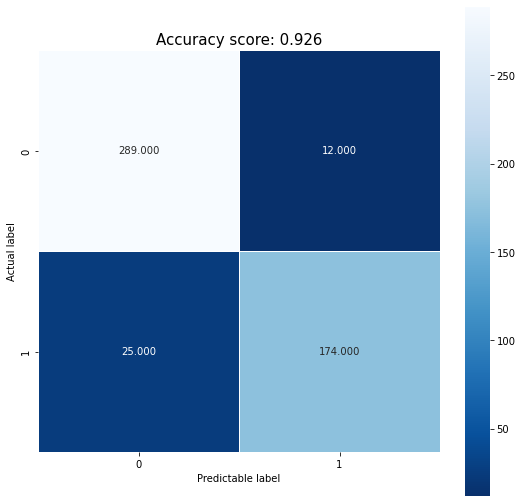

In [5]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predictable label')
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Part One
Write all of the code for your classifier below this cell. There is some very rough skeleton code in the cell directly below. You may insert more cells below this if you wish, but you must not duplicate any cells as this can break the grading script.

### Submission Requirements
Your code must provide a variable with the name `classifier`. This object must have a method called `predict` which takes input data and returns class predictions. The input will be a single $n \times 54$ numpy array, your classifier should return a numpy array of length $n$ with classifications. There is a demo in the cell below, and a test you can run before submitting to check your code is working correctly.

Your code must run on our test machine in under 30 seconds. If you wish to train a more complicated model (e.g. neural network) which will take longer, you are welcome to save the model's weights as a file and then load these in the cell below so we can test it. You must include the code which computes the original weights, but this must not run when we run the notebook – comment out the code which actually executes the routine and make sure it is clear what we need to change to get it to run. Remember that we will be testing your final classifier on additional hidden data.

In [6]:
# This skeleton code simply classifies every input as ham
#
# Here you can see there is a parameter k that is unused, the
# point is to show you how you could set up your own. You might
# also pass in extra data via a train method (also does nothing
# here). Modify this code as much as you like so long as the 
# accuracy test in the cell below runs.
import time

class SpamClassifier:
    
    def __init__(self, k):
        """
        # Model Hyperparameters
        param k: learning rate
        """
        self.k = k
        
    def train(self, X, Y):
        
        # numbe of data points in the datasets(number of rows) --> m
        # number of input features in the dataset (number of columns) --> n
        self.m, self.n = X.shape
        
        # initialize wights and biases
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        

        """
        Updating rules 
        Updating parameters (w and b) gradient descent
        """
        # Gradient descent for optimization 
        for i in range(1000):
            
            # 1000 epochs choosen to improve model accuracy
            # Approximate the data with a linear model
            
            lm = np.dot(X, self.w) + self.b
            # Apply sigmoid to get the probability
            f  = self._sigmoid(lm) # y predicted
            
            # Update the rules
            dw = (1/self.m) * np.dot(self.X.T, (f - self.Y))
            db = (1/self.m) * np.sum(f - self.Y)
            
            # Update weights and biases
            self.w -= self.k * dw
            self.b -= self.k * db
        
    def _sigmoid(self, x):
        # private 
        return 1/(1 + np.exp(-x))
            
    
    def predict(self, X):
        
        # Approximate the data with a linear model then apply sigmoid to get the probability
        
        lm = np.dot(X, self.w) + self.b
        f = self._sigmoid(lm)
        y_pred = np.where(f > 0.5, 1, 0)
        return y_pred
    

def create_classifier():
    classifier = SpamClassifier(k=0.001)
    return classifier

def classifier_accuracy(y_test, y_pred):
    accuracy = np.sum(y_pred ==y_test)/y_test.shape[0]
    return accuracy
    

classifier = create_classifier()

# measure the training time
start_time = time.time()
classifier.train(X_train, y_train)
end_time = time.time()
print("Time taken in seconds:", end_time - start_time)

# Training data accuracy
# X_train_pred = classifier.predict(X_train)
# trainig_data_accuracy = classifier_accuracy(y_train, X_train_pred)
# print("Training data accuracy:", trainig_data_accuracy)

# Testig data accuracy:

X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = classifier_accuracy(X_test_prediction, y_test)

print("Accuracy:", testing_data_accuracy)


Time taken in seconds: 0.11369681358337402
Accuracy: 0.902


### Accuracy Estimate
In the cell below there is a function called `my_accuracy_estimate()` which returns `0.5`. Before you submit the assignment, write your best guess for the accuracy of your classifier into this function, as a percentage between `0` and `1`. So if you think you will get 80% of inputs correct, return the value `0.8`. This will form a small part of the marking criteria for the assignment, to encourage you to test your own code.

In [7]:
def my_accuracy_estimate():
    return 0.902

Write all of the code for your classifier above this cell.

### Testing Details
Your classifier will be tested against some hidden data from the same source as the original. The accuracy (percentage of classifications correct) will be calculated, then benchmarked against common methods. At the very high end of the grading scale, your accuracy will also be compared to the best submissions from other students (in your own cohort and others!). Your estimate from the cell above will also factor in, and you will be rewarded for being close to your actual accuracy (overestimates and underestimates will be treated the same).

#### Test Cell
The following code will run your classifier against the provided test data. To enable it, set the constant `SKIP_TESTS` to `False`.

The original skeleton code above classifies every row as ham, but once you have written your own classifier you can run this cell again to test it. So long as your code sets up a variable called `classifier` with a method called `predict`, the test code will be able to run. 

Of course you may wish to test your classifier in additional ways, but you *must* ensure this version still runs before submitting.

**IMPORTANT**: you must set `SKIP_TESTS` back to `True` before submitting this file!

In [10]:
SKIP_TESTS = True

if not SKIP_TESTS:
    testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(np.int64)
    test_data = testing_spam[:, 1:]
    test_labels = testing_spam[:, 0]

    predictions = classifier.predict(test_data)
    accuracy = np.count_nonzero(predictions == test_labels)/test_labels.shape[0]
    print(f"Accuracy on test data is: {accuracy}")

In [11]:
import sys
import pathlib

fail = False;

if not SKIP_TESTS:
    fail = True;
    print("You must set the SKIP_TESTS constant to True in the cell above.")
    
p3 = pathlib.Path('./spamclassifier.ipynb')
if not p3.is_file():
    fail = True
    print("This notebook file must be named spamclassifier.ipynb")
    
if "create_classifier" not in dir():
    fail = True;
    print("You must include a function called create_classifier.")

if "my_accuracy_estimate" not in dir():
    fail = True;
    print("You must include a function called my_accuracy_estimate.")
else:
    if my_accuracy_estimate() == 0.5:
        print("Warning:")
        print("You do not seem to have provided an accuracy estimate, it is set to 0.5.")
        print("This is the actually the worst possible accuracy – if your classifier")
        print("got 0.1 then it could invert its results to get 0.9!")
    
print("INFO: Make sure you follow the instructions on the assignment page to submit your video.")
print("Failing to include this could result in an overall grade of zero for both parts.")
print()

if fail:
    sys.stderr.write("Your submission is not ready! Please read and follow the instructions above.")
else:
    print("All checks passed. When you are ready to submit, upload the notebook and readme file to the")
    print("assignment page, without changing any filenames.")
    print()
    print("If you need to submit multiple files, you can archive them in a .zip file. (No other format.)")

INFO: Make sure you follow the instructions on the assignment page to submit your video.
Failing to include this could result in an overall grade of zero for both parts.

All checks passed. When you are ready to submit, upload the notebook and readme file to the
assignment page, without changing any filenames.

If you need to submit multiple files, you can archive them in a .zip file. (No other format.)


In [1]:
# This is a test cell. Please do not modify or delete.